### Load packages

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
import os

### Load in Data

In [50]:
titanic = pd.read_csv('C:/Users/court/OneDrive/Desktop/titanic.csv')

## Examine all Columns for Normality

In [51]:
pd.options.display.max_columns = None
titanic.head()

,unknown,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,10,1,3,female,4,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
4,11,1,1,female,58,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### Examine columns for clean up 

In [52]:
titanic.columns

Index(['unknown', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Data Wrangling 

In [53]:
titanic2 = titanic

### Recode 

In [54]:
def gender (series): 
    if series == "male":
        return 0
    if series == "female": 
        return 1

In [56]:
titanic2['gender'] = titanic['sex'].apply(gender)

In [57]:
titanic2.head()

,unknown,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
1,3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
2,6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
3,10,1,3,female,4,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1
4,11,1,1,female,58,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1


In [58]:
def location (series): 
    if series == "S":
        return 0
    if series == "C": 
        return 1
    if series == "Q":
        return 2

In [60]:
titanic2['embarked2'] = titanic['embarked'].apply(location)

In [63]:
def genderclassification (series): 
    if series == "man":
        return 0
    if series == "woman": 
        return 1
    if series == "child":
        return 2

In [64]:
titanic2['genGroup'] = titanic['who'].apply(genderclassification)

### Subset Data

In [67]:
titanic3 = titanic2.drop(['unknown','class', 'adult_male', 'deck', 'alive', 'alone', 'embark_town', 'sex', 'embarked', 'who'], axis=1)

In [69]:
titanic3.dropna()

,survived,pclass,age,sibsp,parch,fare,gender,embarked2,genGroup
0,1,1,38,1,0,71.2833,1,1,1
1,1,1,35,1,0,53.1000,1,0,1
2,0,1,54,0,0,51.8625,0,0,0
3,1,3,4,1,1,16.7000,1,0,2
4,1,1,58,0,0,26.5500,1,0,1
...,...,...,...,...,...,...,...,...,...
177,1,1,47,1,1,52.5542,1,0,1
178,0,1,33,0,0,5.0000,0,0,0
179,1,1,56,0,1,83.1583,1,1,1
180,1,1,19,0,0,30.0000,1,0,1


# How did survival differ among the passengers aboard the Titanic based on: gender, age, and socio-economic status?

array([[<AxesSubplot:title={'center':'gender'}>]], dtype=object)

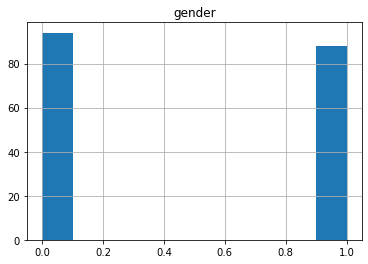

In [114]:
titanic3.hist('gender')

<AxesSubplot:>

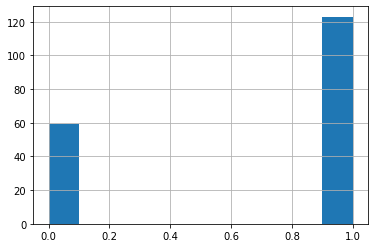

In [91]:
titanic3.survived.hist()

In [ ]:
#More people survived than didnt!
#0= Didnt Survived, 1=Survived 

<AxesSubplot:>

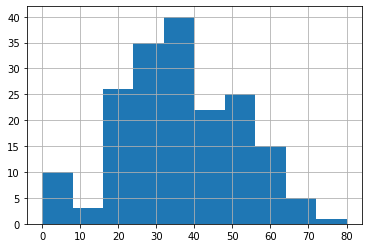

In [92]:
titanic3.age.hist()

C:\Users\Court\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

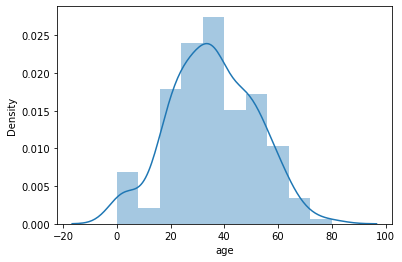

In [95]:
sns.distplot(titanic3['age'])

In [ ]:
#Automated histogram with a best-fit curved line

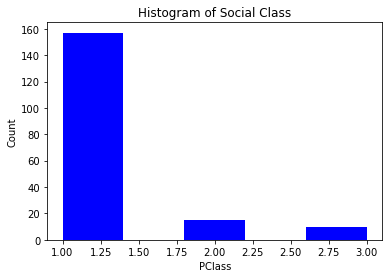

In [119]:
num_bins = 5
n, bins, patches = plt.hist(titanic3['pclass'], num_bins, facecolor='blue', alpha=1)
plt.xlabel('PClass')
plt.ylabel('Count')
plt.title('Histogram of Social Class')
plt.show()

### Histograms for all quantitative data

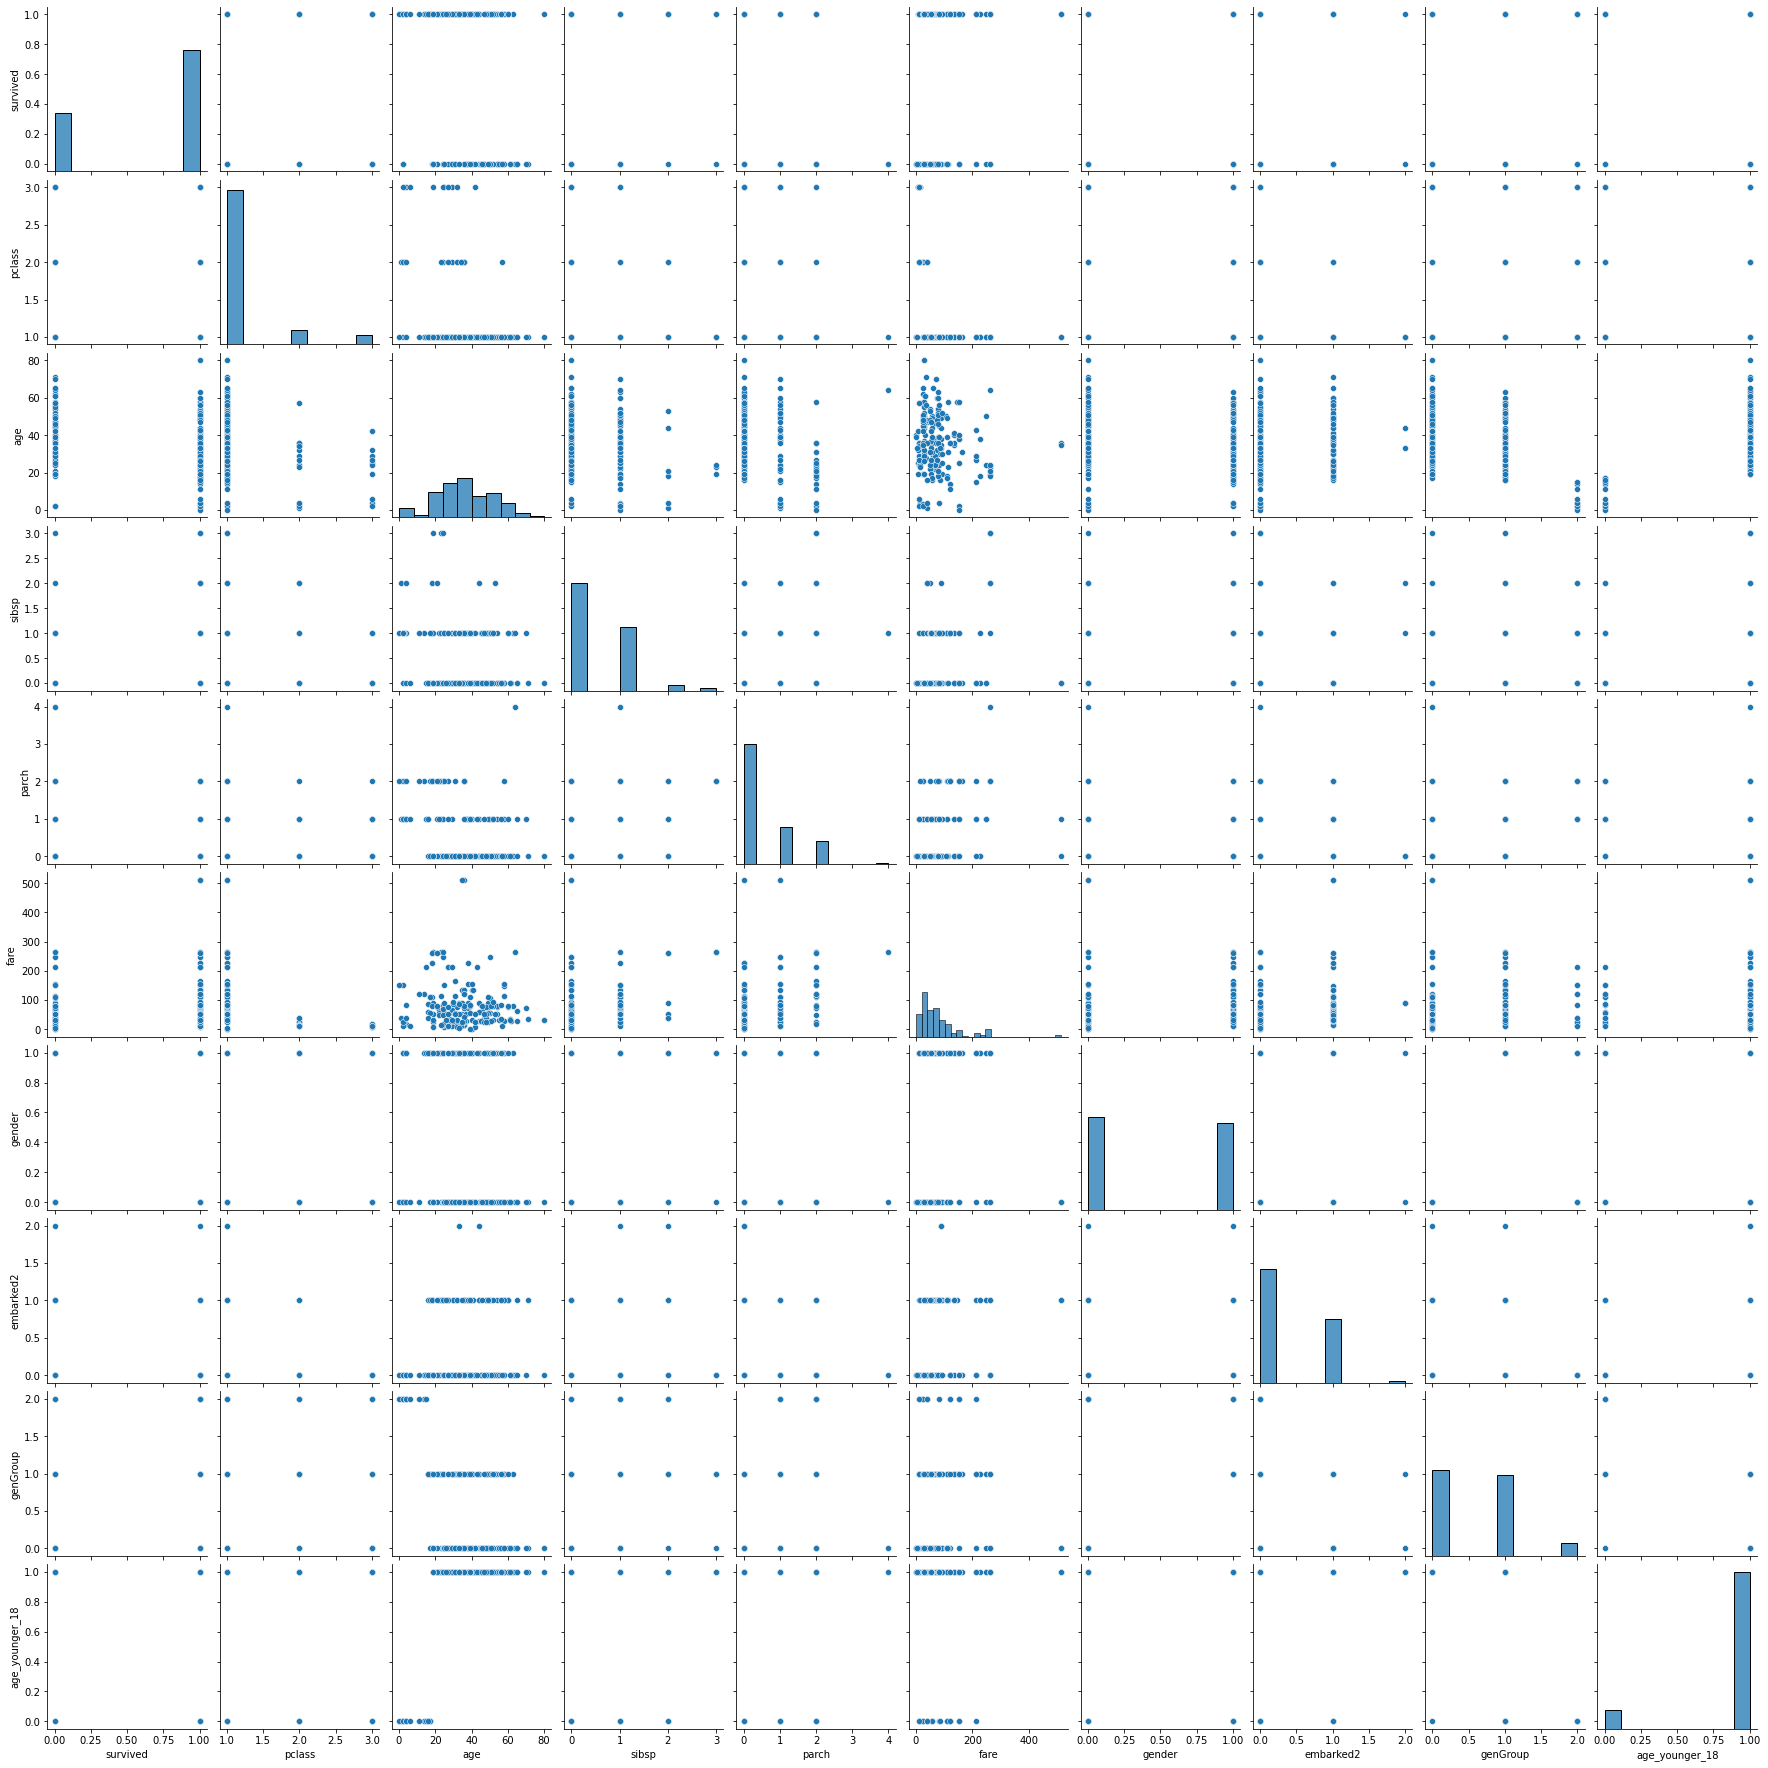

In [96]:
sns.pairplot(titanic3)

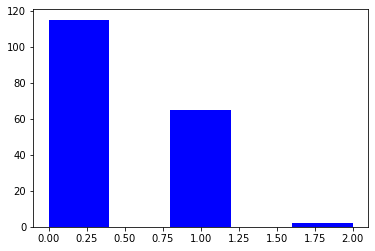

In [107]:
num_bins = 5
n, bins, patches = plt.hist(titanic3['embarked2'], num_bins, facecolor='blue', alpha=1)
plt.show()

## How many passengers were under 17 and under?

In [83]:
def age_recode (series): 
    if series < 18:
        return 0
    if series > 18: 
        return 1

In [85]:
titanic3['age_younger_18'] = titanic3['age'].apply(age_recode)

In [86]:
titanic3.age_younger_18

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
177    1.0
178    1.0
179    1.0
180    1.0
181    1.0
Name: age_younger_18, Length: 182, dtype: float64

In [88]:
##This shows how many passengers were under 18 (0) and anyone over 18 (1).
##I created a new categorical variable that is "Yes, under 18 years of age," or "No, is over 18 years of age." 
#Recoding the continuous variable Age into categories:

## Average age that survived

In [109]:
titanic3.groupby('survived')['age'].mean()

survived
0    41.271186
1    32.894309
Name: age, dtype: float64

In [120]:
titanic3.info

<bound method DataFrame.info of      survived  pclass  age  sibsp  parch     fare  gender  embarked2  \
0           1       1   38      1      0  71.2833       1          1   
1           1       1   35      1      0  53.1000       1          0   
2           0       1   54      0      0  51.8625       0          0   
3           1       3    4      1      1  16.7000       1          0   
4           1       1   58      0      0  26.5500       1          0   
..        ...     ...  ...    ...    ...      ...     ...        ...   
177         1       1   47      1      1  52.5542       1          0   
178         0       1   33      0      0   5.0000       0          0   
179         1       1   56      0      1  83.1583       1          1   
180         1       1   19      0      0  30.0000       1          0   
181         1       1   26      0      0  30.0000       0          1   

     genGroup  age_younger_18  
0           1             1.0  
1           1             1.0  
2      

In [121]:
titanic3.describe()

,survived,pclass,age,sibsp,parch,fare,gender,embarked2,genGroup,age_younger_18
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,178.000000
mean,0.675824,1.192308,35.609890,0.467033,0.478022,78.919735,0.483516,0.379121,0.593407,0.893258
std,0.469357,0.516411,15.681798,0.645007,0.755869,76.490774,0.501107,0.508712,0.621494,0.309655
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,2.000000,2.000000,1.000000


##a bar chart is a visualization of a categorical variable.

<AxesSubplot:>

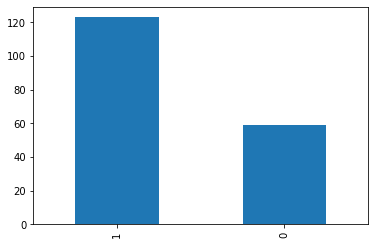

In [124]:
titanic3['survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

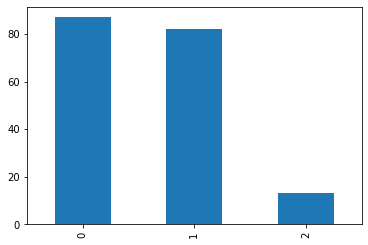

In [125]:
titanic3['genGroup'].value_counts().plot(kind='bar')

<AxesSubplot:>

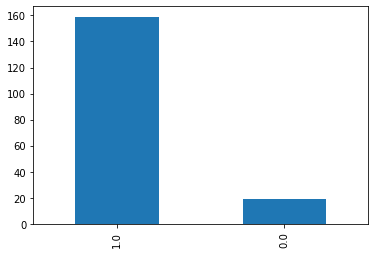

In [126]:
titanic3['age_younger_18'].value_counts().plot(kind='bar')

<AxesSubplot:>

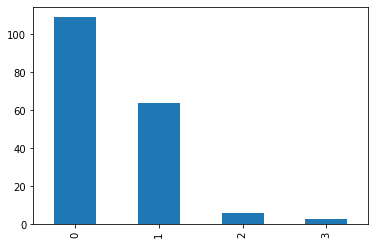

In [128]:
titanic3['sibsp'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Survived')

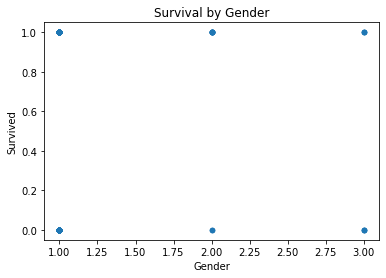

In [130]:
Plot = titanic3.plot.scatter(x='pclass', y='survived')
Plot.set_title("Survival by Gender")
Plot.set_xlabel("Gender")
Plot.set_ylabel("Survived")

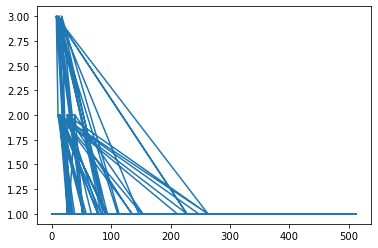

In [136]:
plt.plot(titanic3['fare'], titanic3['pclass'])

In [132]:
titanic3.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'gender',
       'embarked2', 'genGroup', 'age_younger_18'],
      dtype='object')

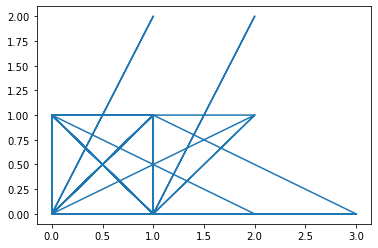

In [137]:
plt.plot(titanic3['sibsp'], titanic3['embarked2'])

## Create a correlation matrix and round to read

In [138]:
matrix = titanic3.corr().round(2)

In [139]:
print(matrix)

                survived  pclass   age  sibsp  parch  fare  gender  embarked2  \
survived            1.00   -0.04 -0.25   0.10   0.02  0.13    0.53       0.08   
pclass             -0.04    1.00 -0.31  -0.11   0.05 -0.32    0.04      -0.24   
age                -0.25   -0.31  1.00  -0.15  -0.27 -0.09   -0.18       0.09   
sibsp               0.10   -0.11 -0.15   1.00   0.25  0.28    0.10       0.01   
parch               0.02    0.05 -0.27   0.25   1.00  0.39    0.09      -0.10   
fare                0.13   -0.32 -0.09   0.28   0.39  1.00    0.13       0.23   
gender              0.53    0.04 -0.18   0.10   0.09  0.13    1.00       0.06   
embarked2           0.08   -0.24  0.09   0.01  -0.10  0.23    0.06       1.00   
genGroup            0.51    0.23 -0.50   0.19   0.29  0.09    0.74      -0.09   
age_younger_18     -0.16   -0.22  0.60  -0.12  -0.32 -0.00   -0.07       0.15   

                genGroup  age_younger_18  
survived            0.51           -0.16  
pclass              0.

## Create heatmat of correlation matrix with divergent colors

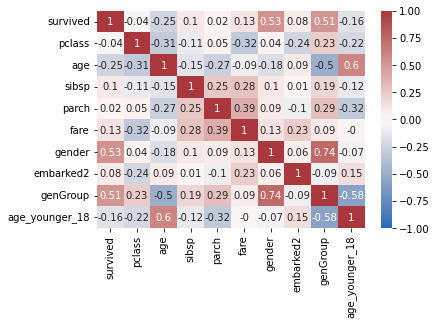

In [140]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

## Create map of only lower half to read easily

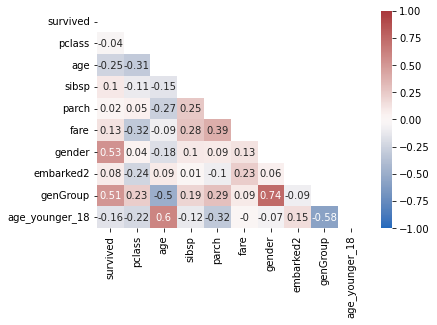

In [141]:
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

## Heat map shows that Pclass, Siblings, Parch and Sex highly correlate with survival rates